x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover
x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)     

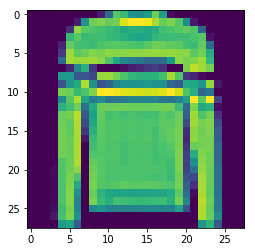

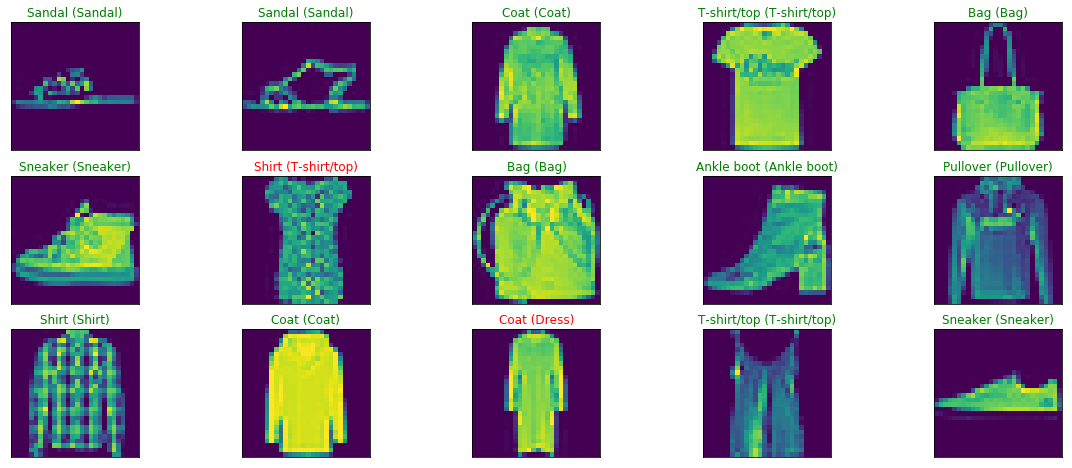

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense, Embedding, Flatten, Dropout, Conv2D, MaxPooling2D



# 미리 섞여진 fashoin-mnist의 학습 데이터와 테스트 데이터 로드
# (학습 이미지, 학습 레이블), (테스트 이미지, 테스트 레이블)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습 셋 크기(shape) - 이미지 크기가 28x28 인 60,000 개의 학습 이미지 데이터, 60,000 개의 레이블
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습 셋과 테스트 셋의 데이터 개수
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2
                        "Dress",        # 인덱스 3
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6
                        "Sneaker",      # 인덱스 7
                        "Bag",          # 인덱스 8
                        "Ankle boot"]   # 인덱스 9

# 이미지 인덱스, 0에서 59,999 사이의 숫자를 선택할 수 있습니다.
img_index = 5

# y_train 은 에서 9까지의 레이블 포함합니다.
label_index = y_train[img_index]

# 레이블 출력해 봅니다. 예를들어 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# 학습 데이터 중에서 이미지 한 장을 보여줍니다.
plt.imshow(x_train[img_index])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 학습 데이터 셋을 학습 / 평가 셋으로 나눈다. (# 학습 셋: 55,000, 검증 셋: 5000)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# 입력 이미지의 크기를 (28, 28) 에서 (28, 28, 1) 로 배열 차원을 변경(reshape)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# 레이블에 원-핫 인코딩 적용
# 원-핫 벡터는 단 하나의 차원에서만 1이고, 나머지 차원에서는 0인 벡터입니다.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 학습 셋 크기
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습용, 검증용, 테스트용 데이터셋의 개수
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

model = Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten()) # Flatten()은 이미지를 일차원으로 바꿔줍니다.
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

# 가장 높은 검증 정확도의 가중치 불러오기
model.load_weights('model.weights.best.hdf5')

# 테스트 셋으로 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])

# y_hat은 test 데이터셋 예측
y_hat = model.predict(x_test)

# 무작위 샘플로 10 개의 테스트 이미지와 예측 레이블 및 실제 레이블을 그려줍니다.
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index])) # 각각의 이미지를 보여줌
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index]) # 각각의 이미지에 예측레이블 (실제레이블) 표시
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
